# Final Project 4 - Introduction to Python for Data Science Program
**Kelompok 8**

Anggota Kelompok:
* Ervizal Buana Jatiputra (PYTN-KS10-007)
* Ika Nurfitriani (PYTN-KS10-008)
* Muhammad Reesa Rosyid (PYTN-KS10-014)

# Introduction
## Informasi Dataset
Kasus ini membutuhkan untuk mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran. Kumpulan data sampel merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku.

## Sumber Dataset
Dataset yang akan digunakan pada project ini berasal dari website kaggle dan dapat didownload pada link berikut: [Dataset link](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)<br>

## Atribut Dataset
1. CUSTID - Identification of Credit Card holder (Categorical)<br>
2. BALANCE - Balance amount left in their account to make purchases<br>
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
4. PURCHASES - Amount of purchases made from account<br>
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go<br>
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment<br>
7. CASHADVANCE - Cash in advance given by the user<br>
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid<br>
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"<br>
13. PURCHASESTRX - Number of purchase transactions made<br>
14. CREDITLIMIT - Limit of Credit Card for user<br>
15. PAYMENTS - Amount of Payment done by user<br>
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user<br>
17. PRCFULLPAYMENT - Percent of full payment paid by user<br>
18. TENURE - Tenure of credit card service for user<br>

## Tujuan
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:<br>
● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn <br>
● Mampu mempersiapkan data untuk digunakan dalam Clustering <br>
● Mampu mengimplementasikan Clustering pada data yang diberikan

# A. Import Required Libraries
***
Di tahap ini, kami mengimpor beberapa library yang dibutuhkan.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import skew
import scipy.stats as scistats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import plotly.graph_objs as go
from scipy.spatial import ConvexHull
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from yellowbrick.model_selection import validation_curve
import pickle

In [2]:
plt.style.use('Solarize_Light2')
%matplotlib inline
warnings.filterwarnings('ignore')

# B. Data Loading
***
Di tahap ini, kami akan membuat dataframe baru untuk membaca dataset.

In [3]:
# Menampilkan dataset
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Melihat deskripsi statistik dasar dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Kesimpulan Analisis Data Loading**

Pada dataset tersebut terdapat total 18 kolom yang setiap kolom terdapat 8950 baris. Dataset tersebut terdiri dari tipe data 14 float, 3 integer, dan 1 object. Dataset bertipe numerik float, diantaranya adalah BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT. Dataset bertipe data integer, terdiri atas CASH_ADVANCE_TRX, PURCHASES_TRX, TENURE. Dataset bertipe object berupa CUST_ID.

# C. Data Cleaning
***
Di tahap ini, kami akan mengecek missing values dan duplicated data, melihat nilai unik dari semua kolom yang ada, imputasi missing value dan menghapus kolom.

In [6]:
# Mengecek jumlah missing value pada setiap kolom
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Mengecek duplikasi data setiap kolom pada dataset
df.duplicated().sum()

0

In [8]:
# Melihat setiap unique value pada dataset
cols = df.columns.tolist()
for i in cols:
    print(f"Kolom {i}")
    print(df[i].unique())

Kolom CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Kolom BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
Kolom BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
Kolom PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
Kolom ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
Kolom INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
Kolom CASH_ADVANCE
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
Kolom PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 

In [9]:
# Imputasi missing value menggunakan median

null_cols = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
for col in null_cols:
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Drop kolom id
df.drop(['CUST_ID'], axis=1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

**Kesimpulan Analisis Data Cleansing**

Setelah melihat null value pada data, masih terdapat missing value pada kolom MINIMUM_PAYMENTS berjumlah 313, CREDIT_LIMIT bejumlah 1. Kita lakukan imputasi median dikarenakan data missing value bertipe data float. Hal selanjutnya yang dilakukan untuk membersihkan dataset yaitu drop kolom id karena kolom tersebut tidak berpengaruh apa-apa dan fungsinya hanyalah untuk penomoran.

# D. Exploratory Data Analysis (EDA)
***
Di tahap ini, kami akan melakukan analisis sederhana tanpa dan dengan menggunakan visualisasi.

In [11]:
# Menampilkan Measure of Central Tedency dan Measured of Spread tambahan
def measureEDA():
    df_1 = df.copy()
    num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in num_cols:
        print(f"Nilai Median dari {col}          = {df[col].median()}")
        print(f"Nilai Variance dari {col}        = {df[col].var()}")
        print(f"Nilai Range dari {col}           = {df[col].max()-df[col].min()}")
        print("-"*80)

measureEDA()

Nilai Median dari BALANCE          = 873.385231
Nilai Variance dari BALANCE        = 4332774.965193936
Nilai Range dari BALANCE           = 19043.13856
--------------------------------------------------------------------------------
Nilai Median dari BALANCE_FREQUENCY          = 1.0
Nilai Variance dari BALANCE_FREQUENCY        = 0.05612350648805934
Nilai Range dari BALANCE_FREQUENCY           = 1.0
--------------------------------------------------------------------------------
Nilai Median dari PURCHASES          = 361.28
Nilai Variance dari PURCHASES        = 4565208.191108808
Nilai Range dari PURCHASES           = 49039.57
--------------------------------------------------------------------------------
Nilai Median dari ONEOFF_PURCHASES          = 38.0
Nilai Variance dari ONEOFF_PURCHASES        = 2755227.898456086
Nilai Range dari ONEOFF_PURCHASES           = 40761.25
--------------------------------------------------------------------------------
Nilai Median dari INSTALLMENTS_PUR

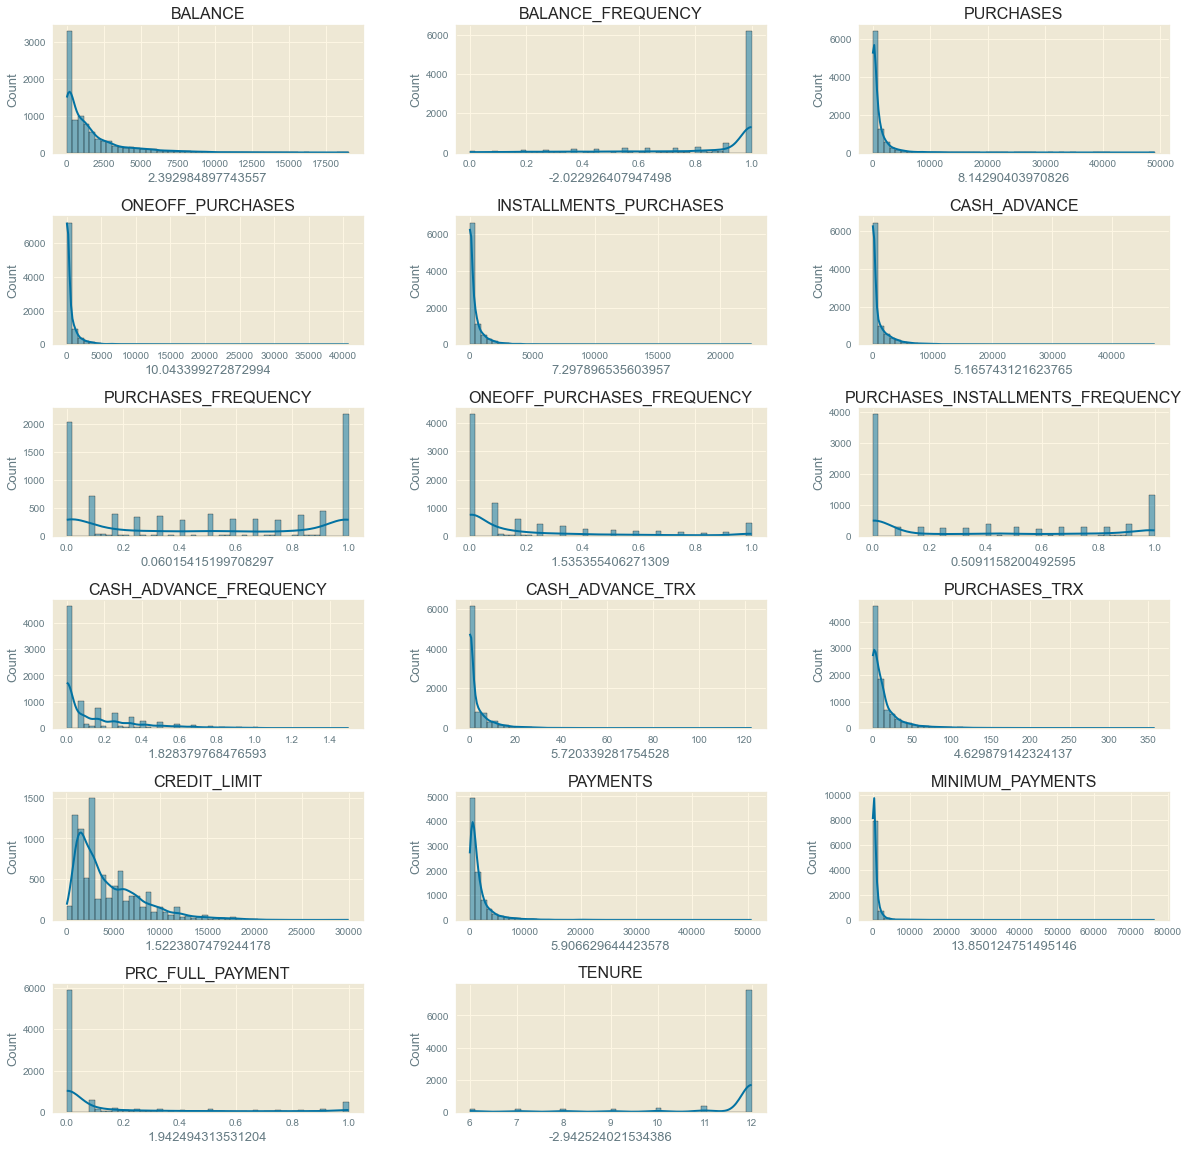

In [12]:
# Cek skweness
cols = df.columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col)
    plt.xlabel(f'{skew(df[col])}', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50, kde=True)

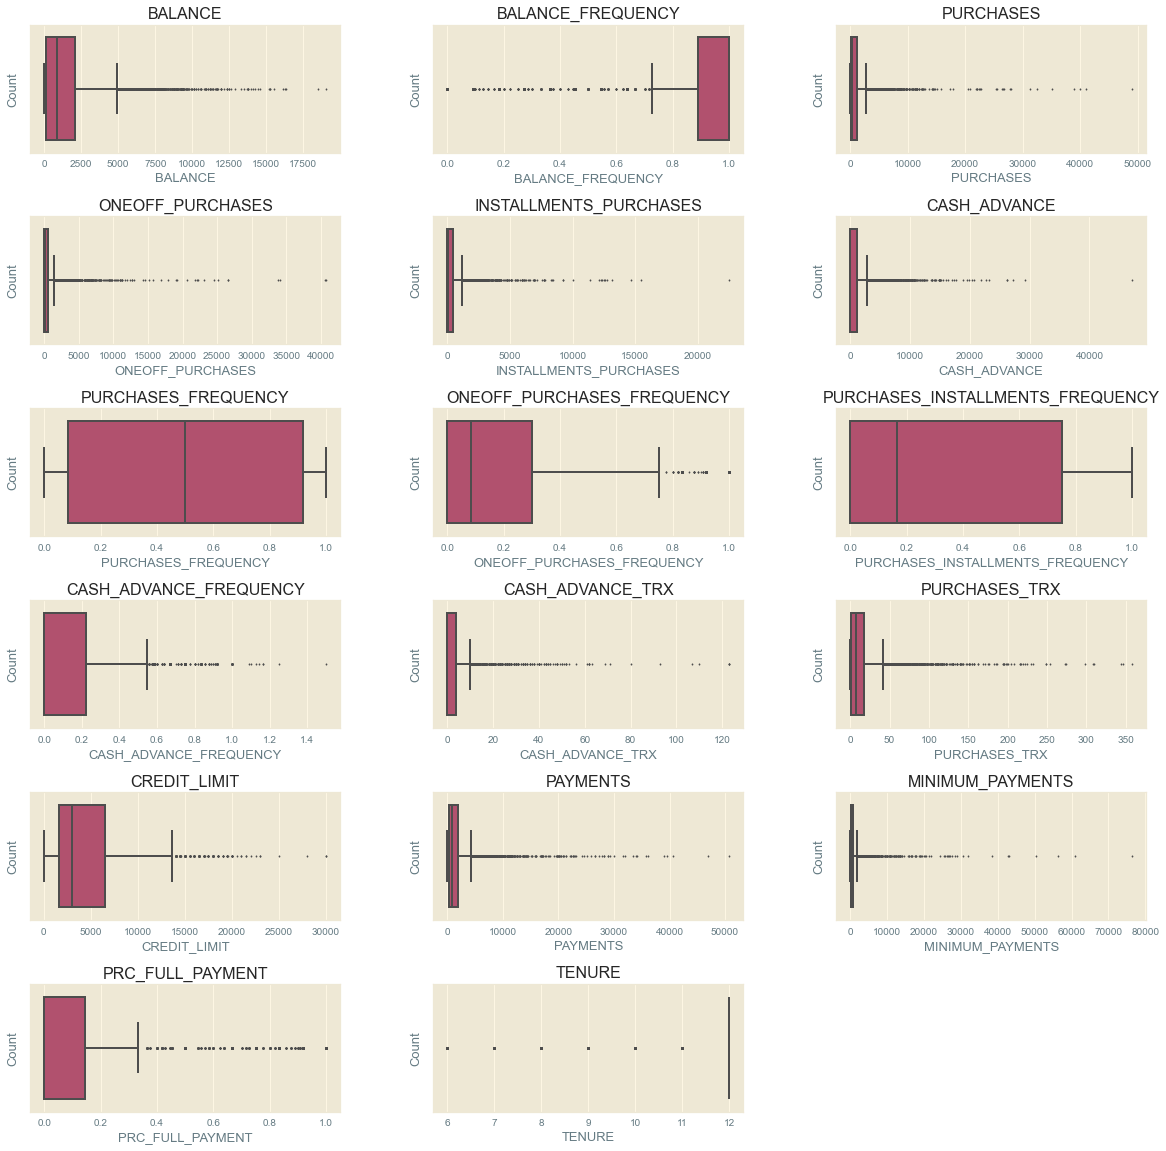

In [13]:
# Cek Outliers
cols = df.columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

<AxesSubplot:>

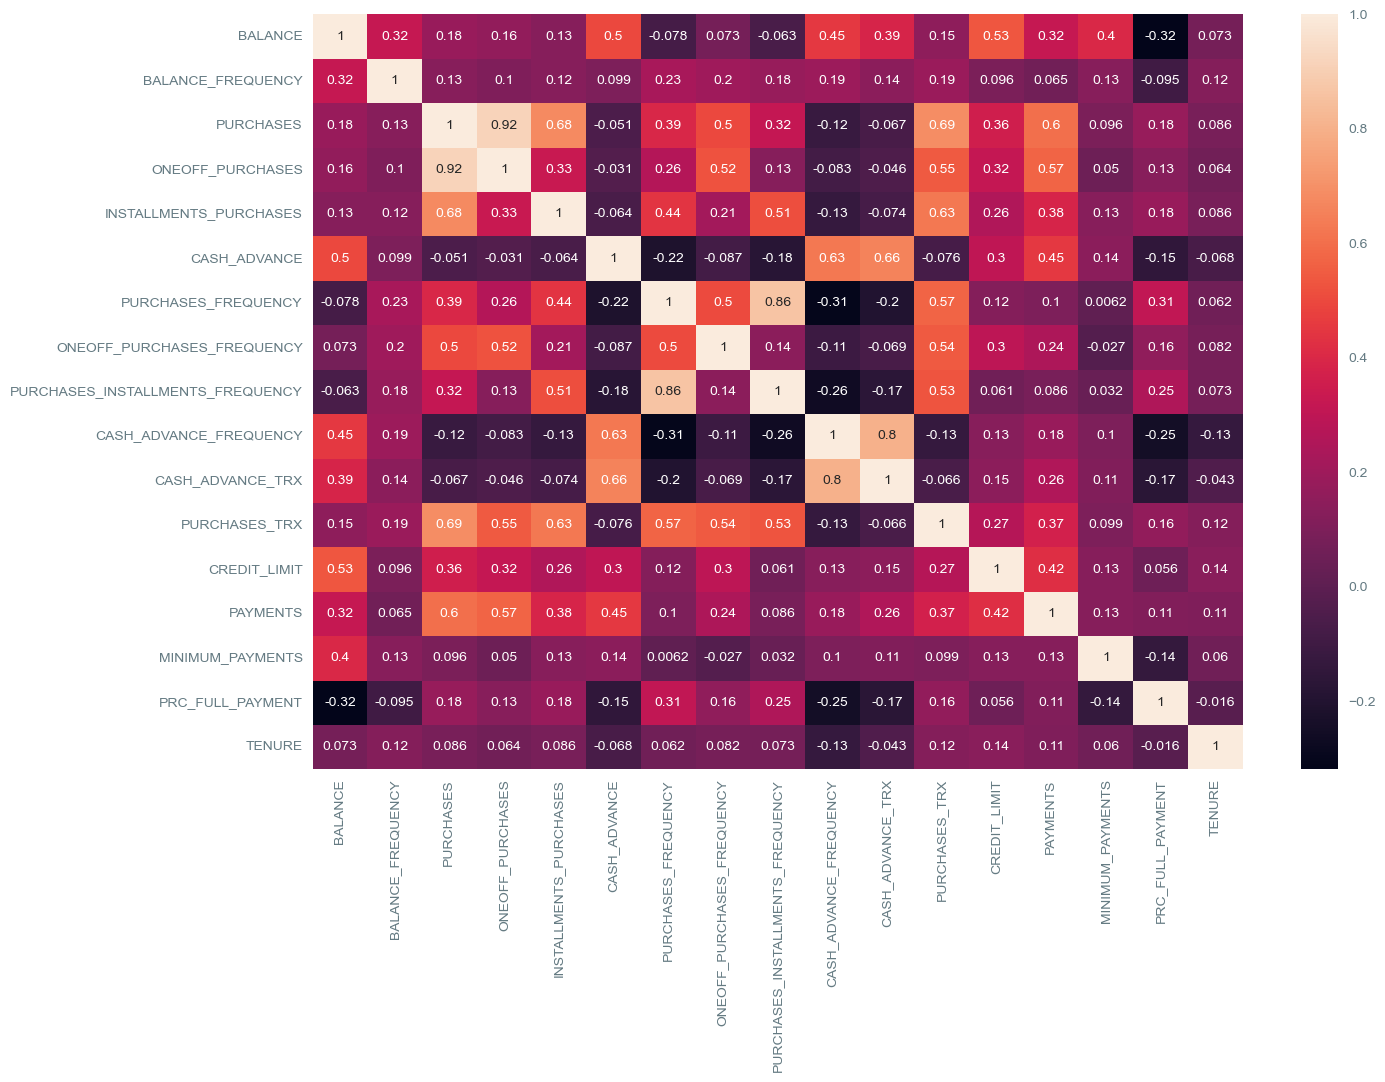

In [14]:
# Cek korelasi
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(df.corr(), annot=True)

**Kesimpulan Analisis EDA**

Dilihat pada plot di atas, skweness data terlihat berdistribusi tidak normal, masih terdapat banyak sekali outlier dibanyak feature, dan berbagai nilai korelasi. Hal tersebut tidak perlu dihiraukan karena tidak terlalu berpengaruh untuk algoritma segmentasi. Alasanya akan menampilkan sebuah karakteristik yang sama dari sebuah segmen.

# E. Preprocessing Data
***
Di tahap ini, kami akan melihat distribusi data, melihat korelasi kolom, menghapus beberapa kolom, menentukan feature dan target, dan melakukan splitting data.

## Scaling Data
Pada scaling data kami akan menggunakan teknik scaling yaitu min max scaling.

In [15]:
# Scaling menggunakan minamax scaler
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [16]:
# Melihat dataset yang sudah di scaling
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [17]:
# Melihat deskripsi data scaled
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


## Reduksi dimensi menggunakan PCA

In [18]:
# DEKLARASI PCA
# n_components kita gunakan 0.95 agar informasi yang dipertahankan 95% variance dalam dataset
pca = PCA(n_components=0.95, random_state=42)
pca_scaled = pca.fit(df_scaled)

In [19]:
# Membuat dataframe data yang sudah direduksi
pc = ['PC'+str(n) for n in range(1, len(pca_scaled.components_)+1)]
df_pca = pd.DataFrame(pca_scaled.transform(df_scaled), columns=pc)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.482168,-0.097653,-0.046473,-0.058293,0.109979,-0.171672,0.018602
1,-0.608575,-0.019376,0.082109,-0.218748,-0.099024,0.137029,0.047467
2,0.304508,0.920934,0.012204,0.160033,0.162325,-0.158527,-0.006547
3,-0.588622,-0.005631,0.037055,0.004430,0.223708,0.065366,0.096132
4,-0.554357,0.052978,-0.084182,-0.132827,-0.017081,-0.204461,0.056412


In [20]:
# Melihat eigen value
pca.explained_variance_

array([0.32895223, 0.0932138 , 0.08519172, 0.05091664, 0.04618568,
       0.02379943, 0.01206621])

In [21]:
# Melihat rasio setiap eigen value
pca.explained_variance_ratio_

array([0.49597096, 0.14054119, 0.12844606, 0.07676852, 0.06963551,
       0.03588311, 0.01819258])

In [22]:
sum(pca.explained_variance_ratio_)

0.9654379326803103

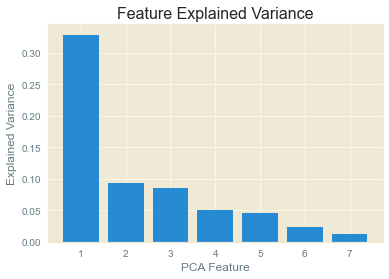

In [23]:
# Ploting eigen value
plt.bar(range(1,len(pca.explained_variance_)+1),
       pca.explained_variance_)
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance")
plt.title("Feature Explained Variance")
plt.show()

## Menentukan jumlah K cluster

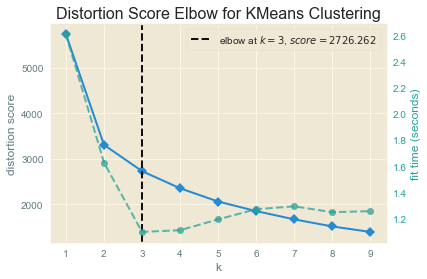

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Membuat plot elbow dengan KElbowVisualizer
model = KMeans(random_state=42)
k_visual = KElbowVisualizer(model, k=(1,10))
k_visual.fit(df_pca)
k_visual.show()

**Kesimpulan Analisis Preprocessing data**

1. Pada proses scaling kita menggunakan algoritma minmax scaler
2. Reduksi dimensi PCA yang menggunakan n component = 0.95 menghasilkan Principal component sebanyak 7 dengan menghasilkan eigen value (0.32895223, 0.0932138 , 0.08519172, 0.05091664,0.04618568, 0.02379943, 0.01206621) dan eigen value rasionya (0.49597096, 0.14054119, 0.12844606, 0.07676852, 0.06963551, 0.03588311, 0.01819258). Dengan demikian, informasi yang dapat dipertahankan sekitar 0.965 dan hasil itu sudah bagus.
3. Penentuan jumlah k cluster yang menggunakan ploting KElbowVisualizer memperlihatkan k terbaik yang dapat digunakan adalah 3. Dengan demikian nantinya akan terbentuk 3 cluster.

# F. Modeling
***
Di tahap ini, kami akan melakukan implementasi model clustering dan melakukan evaluasi pada model yang telah dibuat.

## 1) Model Definition and Model Training

In [25]:
# Deklarasi model clustering
KMeans_model = KMeans(k_visual.elbow_value_, random_state=42)
KMeans_model.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [26]:
# Predict cluster dataset yang telah direduksi
cluster = KMeans_model.predict(df_pca)

In [27]:
# Menambahkan hasil predict cluster ke dalam dataset df, 
#  df yang telah di scaled, dan df yang telah mengalami pca
df["Cluster"] = cluster
df_scaled["Cluster"] = cluster
df_pca["Cluster"] = cluster

In [28]:
# Menampilkan df
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [29]:
# Menampilkan df_scaled
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,2
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0,1
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1


In [30]:
# Menampilkan df_pca
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster
0,-0.482168,-0.097653,-0.046473,-0.058293,0.109979,-0.171672,0.018602,1
1,-0.608575,-0.019376,0.082109,-0.218748,-0.099024,0.137029,0.047467,1
2,0.304508,0.920934,0.012204,0.160033,0.162325,-0.158527,-0.006547,2
3,-0.588622,-0.005631,0.037055,0.004430,0.223708,0.065366,0.096132,1
4,-0.554357,0.052978,-0.084182,-0.132827,-0.017081,-0.204461,0.056412,1


## 2) Model Evaluation

###  Plot untuk mengetahui jumlah dan ratio cluster

In [31]:
# Plot cluster menggunakan pie plot
x = df['Cluster'].unique().tolist()
y = df['Cluster'].value_counts().tolist()

fig = go.Figure(data=[go.Pie(labels=x, values=y)])
fig.update_layout(title = "Cluster Proportions")
fig.show()

In [32]:
# Plot cluster menggunakan bar plot
fig = go.Figure(go.Bar(x=x, y=y, marker={'color':['red','green','blue']}))
fig.update_layout(title = "Total value per cluster",
                  #colorway = ["#1f77b4"], ["#ff7f0e"], ["#2ca02c"],
                  xaxis_title="Cluster",
                  yaxis_title = "Count")
fig.show()

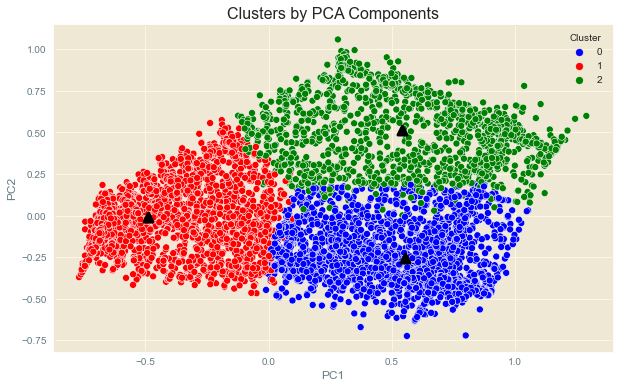

In [33]:
# Plot clusters by pca component
x_axis = df_pca['PC1']
y_axis = df_pca['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x_axis, y_axis, hue=df_pca['Cluster'], palette=['blue','red','green'])
centroid = KMeans_model.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='^', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()

### Analisis tiap cluster

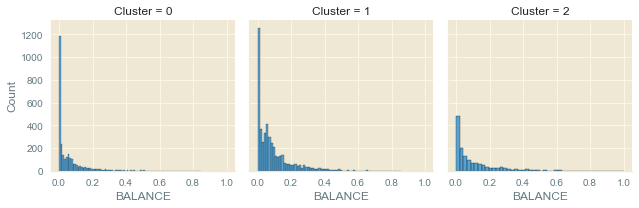

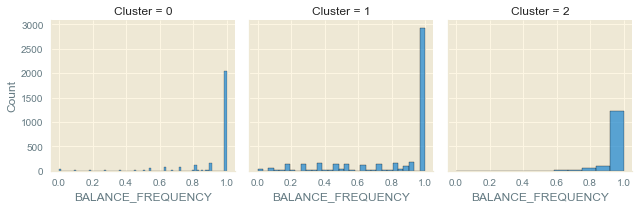

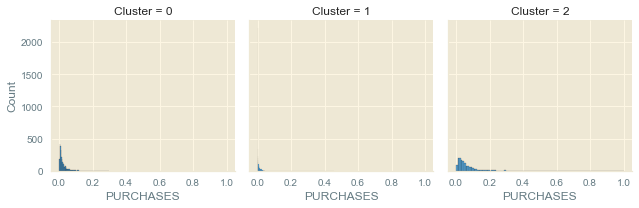

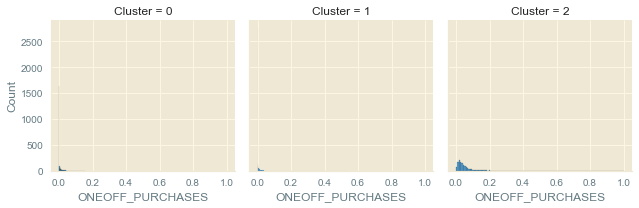

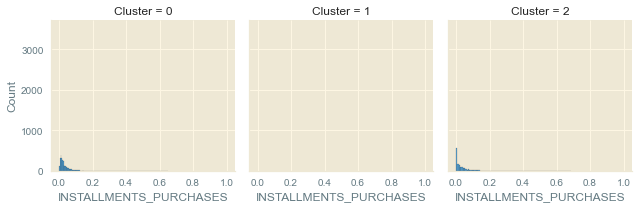

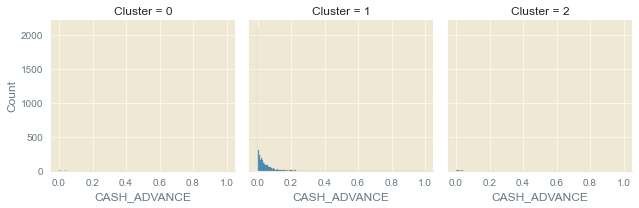

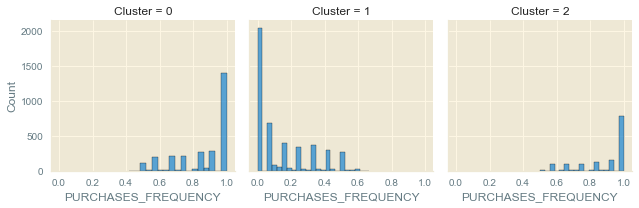

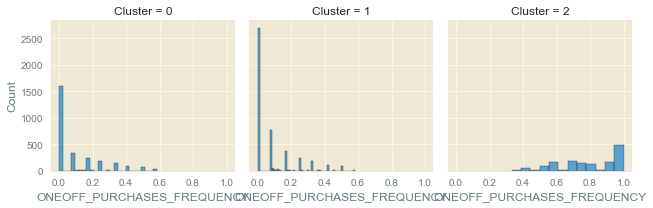

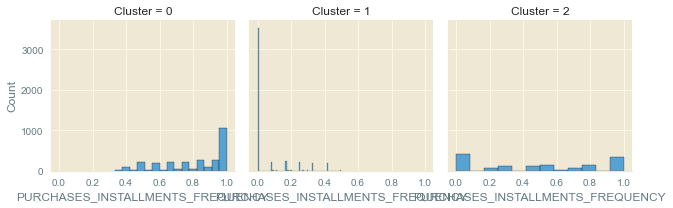

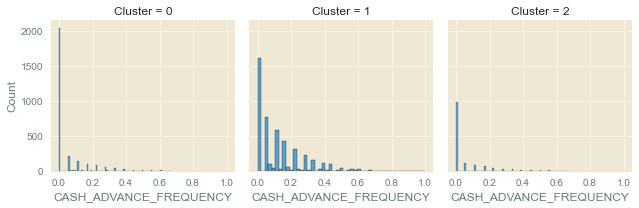

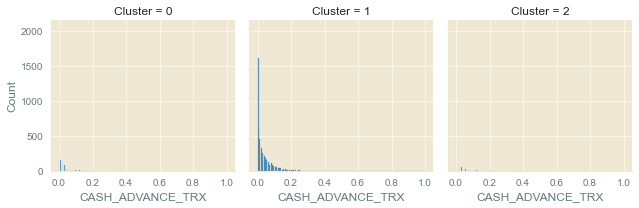

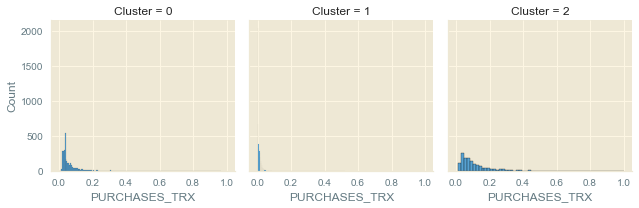

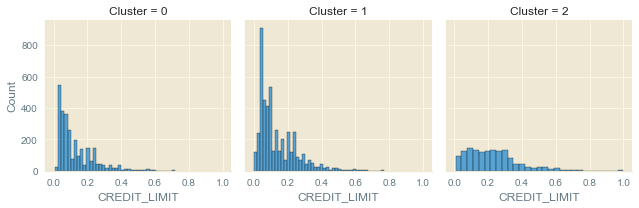

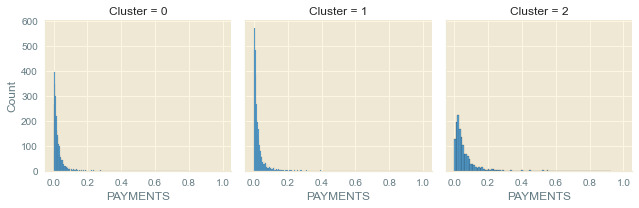

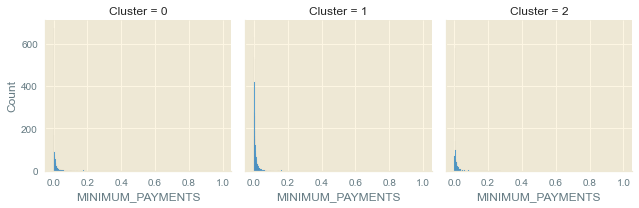

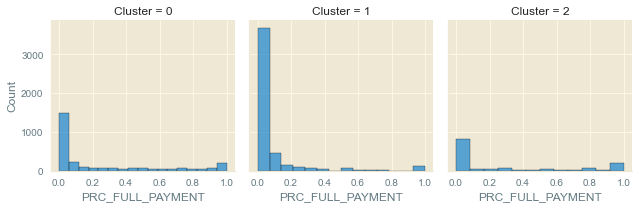

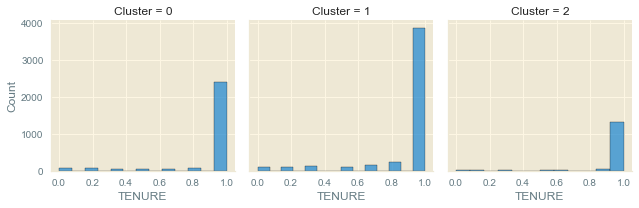

In [34]:
# Plot untuk menganalisa tiap cluster
for x in df_scaled.drop('Cluster', axis=1).columns:
    plot = sns.FacetGrid(df_scaled, col='Cluster')
    plot.map(sns.histplot, x)

**Kesimpulan Analisis Modeling**

Setelah melakukan modeling dan proses training di atas, terdapat tiga cluster yang terbentuk yaitu cluster 0, 1, dan, 2. Tiga cluster yang terbentuk tadi akan dimasukan ke dalam tiap-tiap dataset (df, df_pca, df_scaled). Dari cluster yang telah dimasukan tadi dapat kita liat proporsi dari tiap-tiap cluster. Cluster 1 menempati posisi proporsi paling banyak yaitu 52.8% atau sebanyak 4728 data, diikuti oleh cluster 2 dengan proporsi 31.1% atau 2786 data, dan cluster 0 memiliki rasio 16% dengan data sebanyak 1436.

Analisa perilaku cluster tiap feature:
* Cluster 1: Perilaku pada cluster ini memiliki jumlah balance yang paling tinggi daripada yang lain, jarang sekali melakukan pembelian, jumlah pembelian maksimum dalam sekali jalan sangat sedikit, hampir tidak pernah sama sekali melakukan pembelian secara mencicil, memiliki credit limit yang bervariasi, masa berlaku layanan kartu kredit yang tinggi.
* Cluster 0: Perilaku pada cluster ini memiliki jumlah balance yang paling sedikit, melakukan pembelian yang tidak terlalu sering, jumlah pembelian maksimum dalam sekali jalan berada di tengah-tengah, banyak melakukan pembelian secara mencicil, memiliki kredit limit yang kecil, masa berlaku layanan kartu kredit moderat.
* Cluster 2: Perilaku pada cluster ini memiliki jumlah balance yang moderat, paling sering melakukan pembelian, paling banyak memiliki jumlah pembelian maksimum dalam sekali jalan, paling banyak melakukan pembelian secara mencicil, memiliki credit limit yang lumayan besar, masa berlaku layanan kartu kredit yang rendah.

# G. Additional Step for Predict New Data Using Random Forest
***

## a) Data Loading Random Forest

In [35]:
# Melihat dataframe
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## b) Preprocessing Random Forest

### Cek Korelasi dan Feature Importance

<AxesSubplot:>

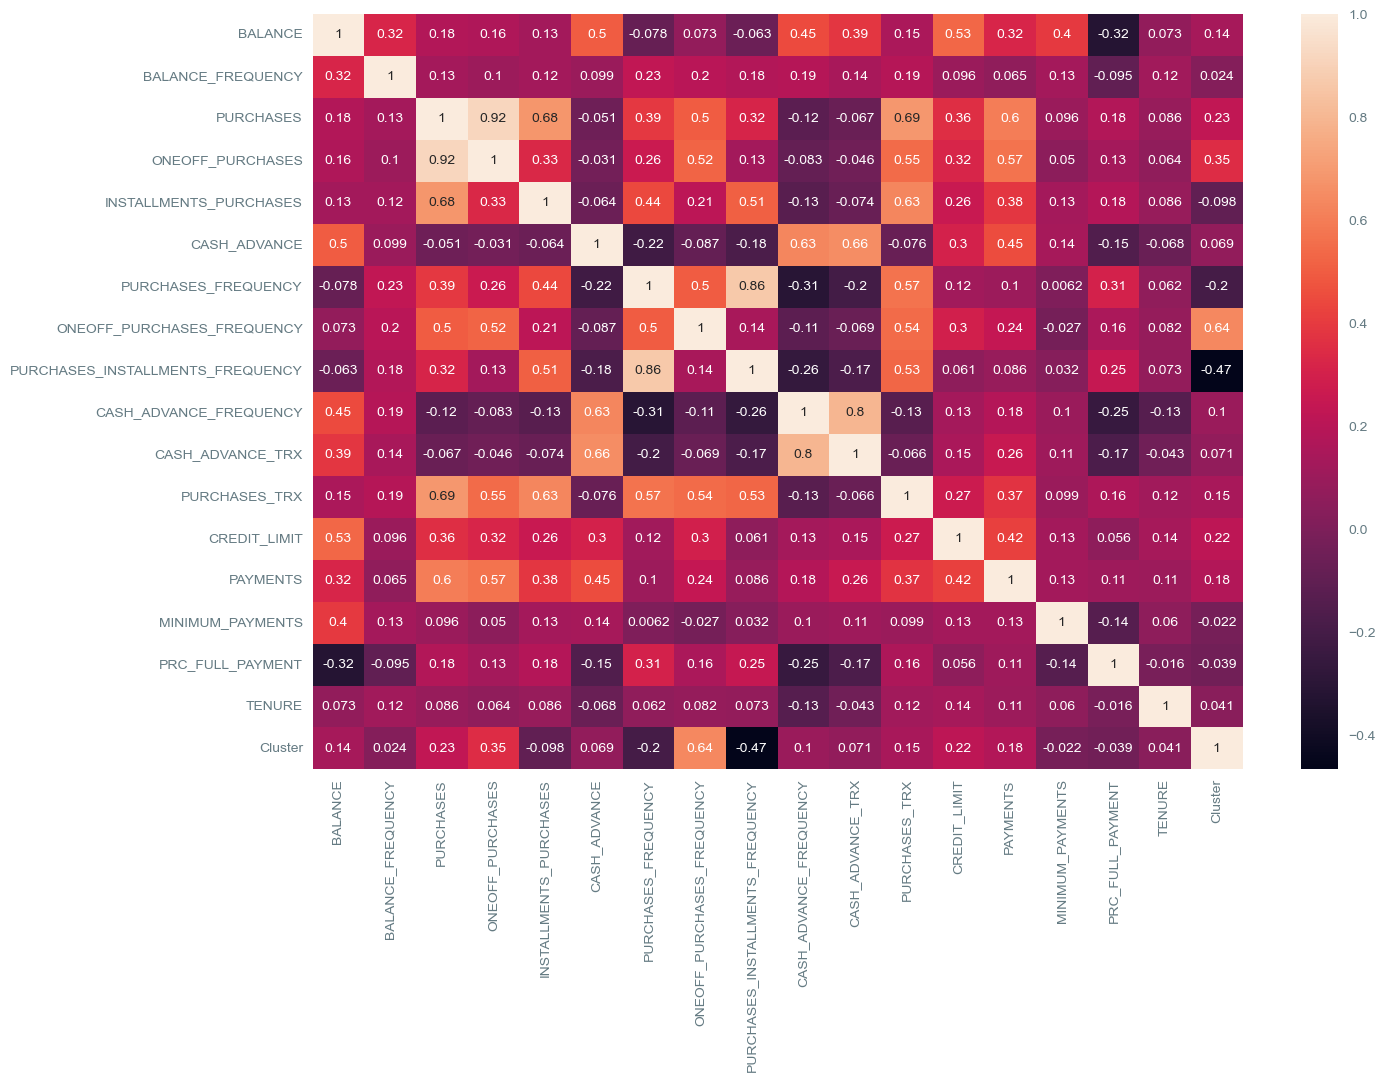

In [36]:
# Melihat korelasi data
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(df.corr(), annot=True)

In [37]:
# Deklarasi X dan y
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Split data
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [38]:
# Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 0, 'Feature Importance')

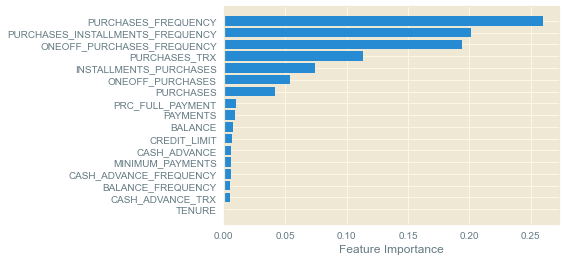

In [39]:
# Cek feature importance
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [40]:
# Drop kolom yang memiliki feature importance yang rendah
df_rf = df.copy()
df_rf.drop(['TENURE', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
            'BALANCE', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'PAYMENTS'], axis=1, inplace=True)
df_rf.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,Cluster
0,95.40,0.00,95.4,0.166667,0.000000,0.083333,2,1
1,0.00,0.00,0.0,0.000000,0.000000,0.000000,0,1
2,773.17,773.17,0.0,1.000000,1.000000,0.000000,12,2
3,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1,1
4,16.00,16.00,0.0,0.083333,0.083333,0.000000,1,1


In [41]:
# Deklarasi X dan y dan split data baru
X = df_rf.drop('Cluster', axis=1)
y = df_rf['Cluster']

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

**Kesimpulan Analisis EDA**

Dari preprocessing tersebut dilakukan pengecekan korelasi fitur yang berpengaruh dengan menggunakan fungsi fiture importance. Dapat dilihat bahwa feature ('TENURE', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'BALANCE_FREQUENCY', 'MINIMUM_PAYMENTS', 'BALANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT', 'PAYMENTS', 'CASH_ADVANCE') memiliki korelasi yang rendah saat diuji dengan random forest. Oleh karena itu feature tersebut akan dihilangkan.

## C) Modeling Random Forest

### 1. Model Definition and Model Training

In [42]:
# Deklarasi model Random forest
rf = RandomForestClassifier()
rfmodel = rf.fit(X_train, y_train)

In [43]:
# Melakukan predict pada data test
y_pred = rfmodel.predict(X_test)

In [44]:
# Melihat akurasi model Random Forest
print("Acc: ", metrics.accuracy_score(y_test, y_pred.round()))

Acc:  0.988268156424581


### 2. Model Evaluation

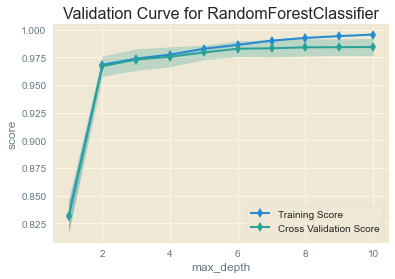

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [45]:
# Melakukan plot corss val
print(validation_curve(rfmodel, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

In [46]:
# Melihat classification report
print (metrics.classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       541
           1       0.99      0.99      0.99       950
           2       0.99      0.98      0.98       299

    accuracy                           0.99      1790
   macro avg       0.99      0.99      0.99      1790
weighted avg       0.99      0.99      0.99      1790



**Kesimpulan Analisis model evaluation**

Pelatihan X_train, y_train dan prediksi menggunakan y_test menunjukan hasil akurasi yang sangat baik sekitar 98%. Untuk memastikan kembali apakah hasil tersebut telah stabil, dilakukan cross validation dengan 10 kali percobaan. Hasil dari training score dan cross validation score menunjukan hasil yang konsisten.

# H. Inference Model Random Forest
***
Di tahap ini kami akan mencoba model untuk memprediksi data yang sudah dibuat.

In [47]:
X.columns

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX'],
      dtype='object')

In [48]:
def prediction(purchases, oneoff_purchases,
               installments_purchases, purchases_frequency,
               oneoff_purchases_frequency,
               purchases_installments_frequency, purchases_trx):
    x = np.zeros(len(X.columns))
    x[0] = purchases
    x[1] = oneoff_purchases
    x[2] = installments_purchases
    x[3] = purchases_frequency
    x[4] = oneoff_purchases_frequency
    x[5] = purchases_installments_frequency
    x[6] = purchases_trx
    return rfmodel.predict([x])[0]

**Studi Percobaan 1**

Jika ada user memiliki jumlah pembelian sebanyak 1333.28, tidak pernah melakaukan pembelian maksimum yang dilakukan sekali jalan, jumlah pembelian kredit sama dengan jumlah pembelian, sering melakukan pembelian, tidak sering melakukan pembelian dalam sekali jalan, sering melakukan pembelian secara mencicil, dan jumlah transaksi pembelian yang dilakukan sejumlah 8 kali. Termasuk cluster berapakah user ini?

In [49]:
prediction(1333.28, 0, 1333.28, 1, 0, 1, 8)

0

**Studi Percobaan 2**

Jika ada user memiliki jumlah pembelian sebanyak 95.40, tidak pernah melakaukan pembelian maksimum yang dilakukan sekali jalan, jumlah pembelian kredit sama dengan jumlah pembelian, tidak sering melakukan pembelian, tidak sering melakukan pembelian dalam sekali jalan, tidak melakukan pembelian secara mencicil, dan jumlah transaksi pembelian yang dilakukan sejumlah 2 kali. Termasuk cluster berapakah user ini?

In [50]:
prediction(95.40, 0, 95.4, 0, 0, 0, 2)

1

**Studi Percobaan 3**

Jika ada user memiliki jumlah pembelian sebanyak 7091.01, sering pernah melakaukan pembelian maksimum yang dilakukan sekali jalan, jumlah pembelian kredit dengan jumlah  688.38, sering melakukan pembelian, sering melakukan pembelian dalam sekali jalan, sering melakukan pembelian secara mencicil, dan jumlah transaksi pembelian yang dilakukan sejumlah 64 kali. Termasuk cluster berapakah user ini?

In [51]:
prediction(7091.01, 1, 688.38, 1, 1, 1, 64)

2

# I. Save Model
***
Di tahap ini, model akan disimpan ke dalam format file pickle.

In [52]:
with open('kmeans_model.pkl','wb') as f:
    pickle.dump(KMeans_model,f)

In [53]:
with open('rf_model.pkl','wb') as f:
    pickle.dump(rfmodel,f)

# J. Overall Analysis
***

Berdasarkan seluruh analisis yang telah dilakukan di atas, dapat disimpulkan bahwa:
* Dataset tersebut terdapat total 18 kolom yang setiap kolom terdapat 8950 baris. Dataset tersebut terdiri dari tipe data 14 float, 3 integer, dan 1 object.
* Pada proses data cleansing, dilihat dataframe tersebut memiliki missing value dan dilakukan imputasi median agar missing value tersebut hilang. Tidak lupa juga menghilangkan kolom id.
* Saat proses EDA ditemukan bahwa data tersebut tidak normal dan mengandung banyak outlier yang natural. Proses penormalan data dan penghilangan outlier tidak dilakukan karena tidak terlalu berpengaruh untuk algoritma segmentasi dengan alasan alogirtma clustering hanya akan mengelompokan suatu segmen berdasarkan karakteristik yang sama.
* Proses preprocessing dilakukan untuk scaling setiap feature pada dataset agar memiliki satuan yang sama, melakukan Reduksi dimensi menggunakan PCA yang menghasilkan pricipal component (reduksi feature) sebanyak 7, dan yang terakhir dilakukan penentuan k cluster menggunakan fungsi KElbowVisualizer yang menghasilkan k sebanyak 3. Penentuan K dapat dilihat pada gambar di bawah ini.<br>
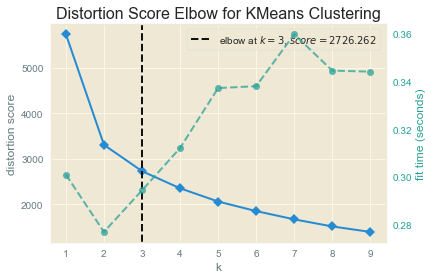
* Pada proses modeling dan training menghasilkan tiga cluster yang terbentuk yaitu cluster 0, 1 dan, 2. Dari cluster yang telah dimasukan tadi dapat kita lihat proporsi dari tiap-tiap cluster. Cluster 1 menempati posisi proporsi paling banyak yaitu 52.8% atau sebanyak 4728 data, diikuti oleh cluster 2 dengan proporsi 31.1% atau 2786 data, dan cluster 0 memiliki rasio 16% dengan data sebanyak 1436. Ada pula distribusi cluster yang dapat dilihat pada gambar dibawah ini.<br>
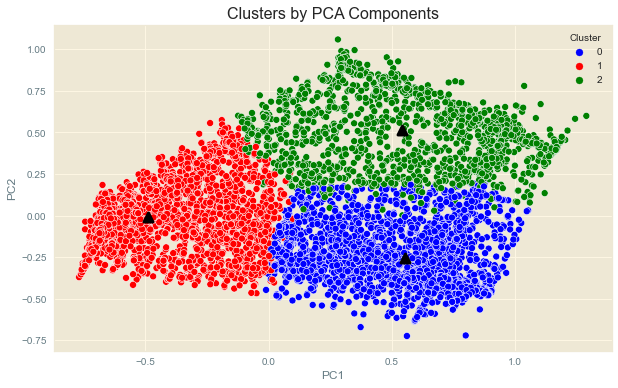
* Analisis perilaku cluster tiap feature:
    1. Cluster 1: Perilaku pada cluster ini memiliki jumlah balance yang paling tinggi daripada yang lain, jarang sekali melakukan pembelian, jumlah pembelian maksimum dalam sekali jalan sangat sedikit, hampir tidak pernah sama sekali melakukan pembelian secara mencicil, memiliki credit limit yang bervariasi, masa berlaku layanan kartu kredit yang tinggi.
    2. Cluster 0: Perilaku pada cluster ini memiliki jumlah balance yang paling sedikit, melakukan pembelian yang tidak terlalu sering, jumlah pembelian maksimum dalam sekali jalan berada di tengah-tengah, banyak melakukan pembelian secara mencicil, memiliki kredit limit yang kecil, masa berlaku layanan kartu kredit moderat.
    3. Cluster 2: Perilaku pada cluster ini memiliki jumlah balance yang moderat, paling sering melakukan pembelian, paling banyak memiliki jumlah pembelian maksimum dalam sekali jalan, paling banyak melakukan pembelian secara mencicil, memiliki credit limit yang lumayan besar, masa berlaku layanan kartu kredit yang rendah.
* Terdapat step tambahan yaitu menjadikan hasil cluster yang telah didapat sebagai fiture target dan akan diprediksi menggunakan algoritma random forest. Pada saat preprocessing dilakukan pengecekan fiture yang kurang berpengaruh dan menghilangkan feature tersebut. Setelah dilakukan proses trainig dan testing menggunakan algoritma random forest, didapatkan hasil akurasi sebesart 98%, lalu dipastikan kembali menggunakan cross validation dengan 10 kali percobaan dan menunjukan hasil yang sangat konsisten. Hasil cross validation dapat dilihat pada gambar di bawah ini.<br>
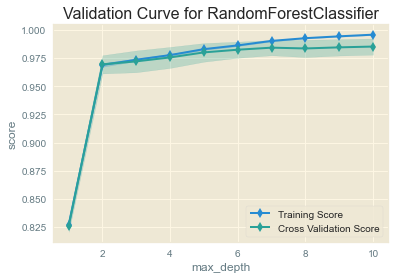
* Proses inference model dilakukan untuk menguji hasil model random forest yang telah dibuat dengan menggunakan data baru. Model tersebut diuji dengan tiga studi percobaan:
    1. Jika ada user memiliki jumlah pembelian sebanyak 1333.28, tidak pernah melakaukan pembelian maksimum yang dilakukan sekali jalan, jumlah pembelian kredit sama dengan jumlah pembelian, sering melakukan pembelian, tidak sering melakukan pembelian dalam sekali jalan, sering melakukan pembelian secara mencicil, dan jumlah transaksi pembelian yang dilakukan sejumlah 8 kali. Hasil tersebut menunjukkan bahwa user ini termasuk cluster 0.
    2. Jika ada user memiliki jumlah pembelian sebanyak 95.40, tidak pernah melakaukan pembelian maksimum yang dilakukan sekali jalan, jumlah pembelian kredit sama dengan jumlah pembelian, sering melakukan pembelian, tidak sering melakukan pembelian dalam sekali jalan, tidak melakukan pembelian secara mencicil, dan jumlah transaksi pembelian yang dilakukan sejumlah 2 kali. Hasil tersebut menunjukkan bahwa user ini termasuk cluster 1.
    3. Jika ada user memiliki jumlah pembelian sebanyak 7091.01, sering pernah melakaukan pembelian maksimum yang dilakukan sekali jalan, jumlah pembelian kredit dengan jumlah 688.38, sering melakukan pembelian, sering melakukan pembelian dalam sekali jalan, sering melakukan pembelian secara mencicil, dan jumlah transaksi pembelian yang dilakukan sejumlah 64 kali. Hasil tersebut menunjukkan bahwa user ini termasuk cluster 2.